In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load Data

In [46]:
# Load your data into a DataFrame (assuming your data is in a CSV file)
Data = pd.read_csv("video_data.csv")
Channel_Data = pd.read_csv("channel_data.csv")

In [47]:
Channel_Data 

,Channel_name,Subscribers,Views,Total_videos,playlist_id
0,Aakash Gupta,4050000,425594088,44,UUAYum5hCyfkSH5T3vSD_kwQ
1,BB Ki Vines,26400000,4915227020,191,UUqwUrj10mAEsqezcItqvwEw
2,Round2hell,32800000,3363666994,68,UUt4atlExw8aj3Bm79nv1fig
3,Abhishek Upmanyu,5120000,453939279,20,UU4muYPMCSYigqIwRjVWkQ2Q
4,Anubhav Singh Bassi,4940000,365630437,8,UUKnZHF24IV9PT0cdSdHoWug
5,Harsh gujral,2070000,192776043,17,UUGmhWgV9bmslB0Levatl6qA
6,CarryMinati,41500000,3659116357,195,UUj22tfcQrWG7EMEKS0qLeEg
7,AB Black,103000,9319291,46,UUy_xISfTbTwzmcMb6Xb25lw
8,Vipul Goyal,766000,93672277,59,UUvLcuNVAb5sKRu7sHuFT0vQ
9,Tanmay Bhat,4690000,1451605486,994,UU0rE2qq81of4fojo-KhO5rg


In [36]:
# Check the first few rows of the dataset
Data.head()

,Unnamed: 0,Channel_ID,Channel_name,Video_Title,Published_Date,Views,Likes,Comments,Video Duration
0,0,UCAYum5hCyfkSH5T3vSD_kwQ,Aakash Gupta,Vaccine cocktail,2024-02-14T14:28:54Z,905828,74478,142,PT54S
1,1,UCAYum5hCyfkSH5T3vSD_kwQ,Aakash Gupta,Australia NZ Tour Feb 2024 Announcement #aakas...,2024-02-13T12:40:18Z,46590,3660,40,PT47S
2,2,UCAYum5hCyfkSH5T3vSD_kwQ,Aakash Gupta,Narcotics | Stand-up Comedy | Aakash Gupta,2024-01-07T05:33:25Z,6429334,311973,3013,PT9M5S
3,3,UCAYum5hCyfkSH5T3vSD_kwQ,Aakash Gupta,Toilet Roll | Aakash Gupta #standupcomedy #com...,2024-01-04T08:59:08Z,320495,26938,54,PT53S
4,4,UCAYum5hCyfkSH5T3vSD_kwQ,Aakash Gupta,German language | Aakash Gupta #standupcomedy ...,2023-12-28T04:06:52Z,471721,34640,88,PT31S


In [53]:
Data.shape

(2287, 8)

In [37]:
# Summary information about the dataset
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2287 entries, 0 to 2286
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      2287 non-null   int64 
 1   Channel_ID      2287 non-null   object
 2   Channel_name    2287 non-null   object
 3   Video_Title     2287 non-null   object
 4   Published_Date  2287 non-null   object
 5   Views           2287 non-null   int64 
 6   Likes           2287 non-null   int64 
 7   Comments        2287 non-null   int64 
 8   Video Duration  2287 non-null   object
dtypes: int64(4), object(5)
memory usage: 160.9+ KB


# Step 2: Data Cleaning and Preprocessing

In [38]:
# Handling Missing Values
# Check for missing values in each column
missing_values = Data.isnull().sum()
missing_values


Unnamed: 0        0
Channel_ID        0
Channel_name      0
Video_Title       0
Published_Date    0
Views             0
Likes             0
Comments          0
Video Duration    0
dtype: int64

In [49]:
#droping the unwanted columns
Data.drop(columns=['Unnamed: 0'], inplace=True)

In [63]:
# Convert 'Published_Date' to datetime
Data['Published_Date'] = pd.to_datetime(Data['Published_Date'])

In [64]:
# Convert 'Video Duration' to timedelta
Data['Video Duration'] = pd.to_timedelta(Data['Video Duration'])

# Step 3: Exploratory Data Analysis (EDA)

In [50]:
# Summary Statistics
summary_stats = Data.describe()
print("Summary Statistics:")
print(summary_stats)

Summary Statistics:
              Views         Likes      Comments
count  2.287000e+03  2.287000e+03  2.287000e+03
mean   8.036729e+06  4.330245e+05  1.344172e+04
std    1.666918e+07  9.157068e+05  5.335577e+04
min    0.000000e+00  0.000000e+00  0.000000e+00
25%    4.108615e+05  2.516250e+04  4.010000e+02
50%    1.571591e+06  9.727600e+04  1.421000e+03
75%    6.863345e+06  3.770650e+05  6.083500e+03
max    3.625338e+08  1.866770e+07  1.715176e+06


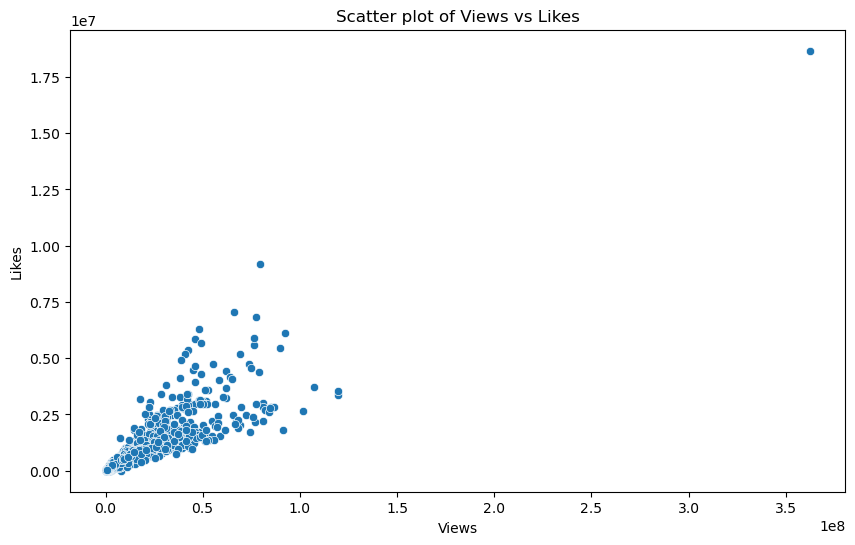

In [43]:
# Scatter plot of Views vs Likes
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Views', y='Likes', data=Data)
plt.title('Scatter plot of Views vs Likes')
plt.xlabel('Views')
plt.ylabel('Likes')
plt.show()

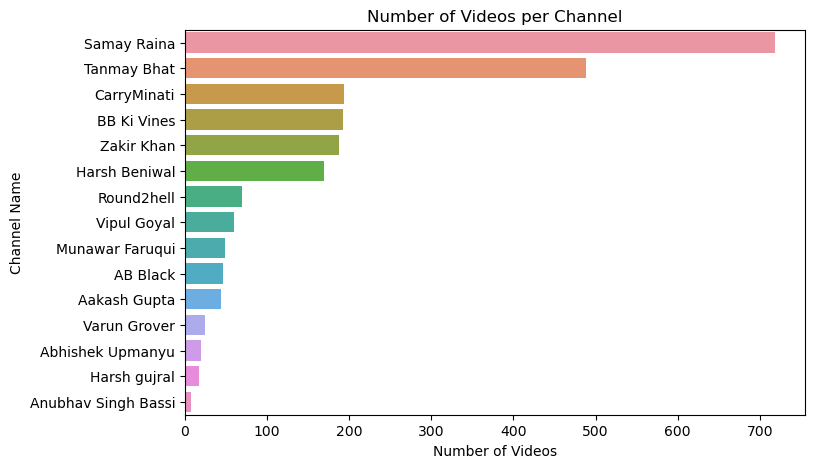

In [80]:
# Bar plot of Channels
plt.figure(figsize=(8, 5))
sns.countplot(y='Channel_name', data=Data, order=Data['Channel_name'].value_counts().index)
plt.title('Number of Videos per Channel')
plt.xlabel('Number of Videos')
plt.ylabel('Channel Name')
plt.show()

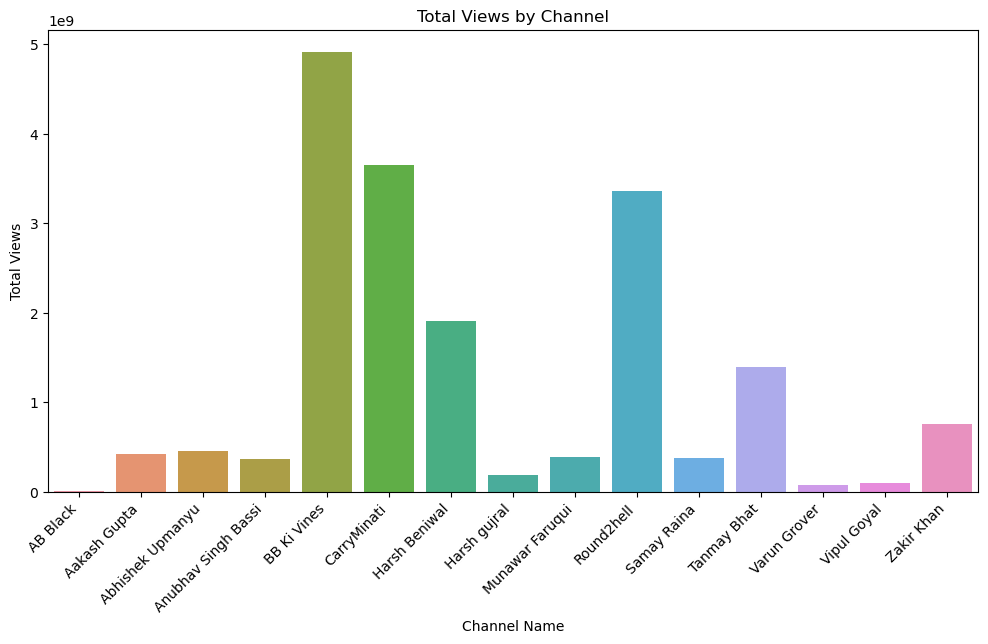

In [82]:
# Channel-level Analysis
# Compare the performance of different channels
channel_performance = Data.groupby('Channel_name').agg({
    'Views': 'sum',
    'Likes': 'sum',
    'Comments': 'sum'
}).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Channel_name', y='Views', data=channel_performance)
plt.title('Total Views by Channel')
plt.xlabel('Channel Name')
plt.ylabel('Total Views')
plt.xticks(rotation=45, ha='right')
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_1604\4101410446.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix =Data.corr()


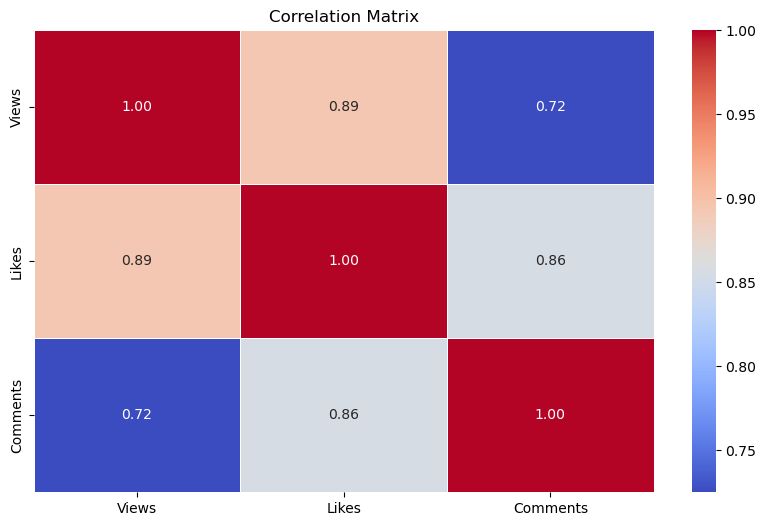

In [51]:
corr_matrix =Data.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Which channel has most views in which month?

In [57]:
# Extract month from 'Published_Date'
df['Month'] = df['Published_Date'].dt.month
# Aggregate views by month and channel
views_by_month_and_channel = df.groupby(['Month', 'Channel_name'])['Views'].sum()

# Find the month and channel with the most views
most_views_month_channel = views_by_month_and_channel.idxmax()
most_views = views_by_month_and_channel.max()

print("Month with the most views:", most_views_month_channel[0])
print("Channel with the most views:", most_views_month_channel[1])
print("Number of views:", most_views)

Month with the most views: 10
Channel with the most views: BB Ki Vines
Number of views: 528940486
